# Study of running time in minutes per kilometer (pace) 📚 🏃
> Author: Luiza Kuze <br> Date: 02/12/2023

## About dataset:

- Data is from the 2023 Boston Marathon
- **Source:** `https://data.scorenetwork.org/running/boston_marathon_2023.html`

In [1]:
#@title Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
plt.style.use('ggplot')

In [2]:
#@title Reading the file

uri = "./boston_marathon_2023.csv"
marathon = pd.read_csv(uri)

## Dataset Structure Analysis 📖

In [3]:
#@title Checking for duplications

marathon.duplicated().any()

False

In [4]:
#@title Renaming columns

marathon.columns = ["division_age", "overall_position", "gender_position", "age_group_position", "name", "team", "bib_number", "half_marathon_time", "net_marathon_time", "gross_marathon_time", "gender", "half_marathon_time_seconds", "net_marathon_time_seconds", "gross_marathon_time_seconds", "net_marathon_time_minutes"]
marathon.head()

,division_age,overall_position,gender_position,age_group_position,name,team,bib_number,half_marathon_time,net_marathon_time,gross_marathon_time,gender,half_marathon_time_seconds,net_marathon_time_seconds,gross_marathon_time_seconds,net_marathon_time_minutes
0,18-39,1,1,1,"Chebet, Evans",Team–,1,1H 2M 20S,2H 5M 54S,2H 5M 54S,M,3740.0,7554,7554,125.900000
1,18-39,2,2,2,"Geay, Gabriel",Team–,3,1H 2M 20S,2H 6M 4S,2H 6M 4S,M,3740.0,7564,7564,126.066667
2,18-39,3,3,3,"Kipruto, Benson",Team–,5,1H 2M 19S,2H 6M 6S,2H 6M 6S,M,3739.0,7566,7566,126.100000
3,18-39,4,4,4,"Korir, Albert",Team–,19,1H 2M 20S,2H 8M 1S,2H 8M 1S,M,3740.0,7681,7681,128.016667
4,18-39,5,5,5,"Talbi, Zouhair",Team–,31,1H 2M 20S,2H 8M 35S,2H 8M 35S,M,3740.0,7715,7715,128.583333


In [5]:
#@title Adding 'Pace' to the table
marathon['pace'] = marathon['net_marathon_time_minutes'] / 42
marathon.head()

,division_age,overall_position,gender_position,age_group_position,name,team,bib_number,half_marathon_time,net_marathon_time,gross_marathon_time,gender,half_marathon_time_seconds,net_marathon_time_seconds,gross_marathon_time_seconds,net_marathon_time_minutes,pace
0,18-39,1,1,1,"Chebet, Evans",Team–,1,1H 2M 20S,2H 5M 54S,2H 5M 54S,M,3740.0,7554,7554,125.900000,2.997619
1,18-39,2,2,2,"Geay, Gabriel",Team–,3,1H 2M 20S,2H 6M 4S,2H 6M 4S,M,3740.0,7564,7564,126.066667,3.001587
2,18-39,3,3,3,"Kipruto, Benson",Team–,5,1H 2M 19S,2H 6M 6S,2H 6M 6S,M,3739.0,7566,7566,126.100000,3.002381
3,18-39,4,4,4,"Korir, Albert",Team–,19,1H 2M 20S,2H 8M 1S,2H 8M 1S,M,3740.0,7681,7681,128.016667,3.048016
4,18-39,5,5,5,"Talbi, Zouhair",Team–,31,1H 2M 20S,2H 8M 35S,2H 8M 35S,M,3740.0,7715,7715,128.583333,3.061508


In [6]:
#@title General overview

marathon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26598 entries, 0 to 26597
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   division_age                 26598 non-null  object 
 1   overall_position             26598 non-null  int64  
 2   gender_position              26598 non-null  int64  
 3   age_group_position           26598 non-null  int64  
 4   name                         26598 non-null  object 
 5   team                         26598 non-null  object 
 6   bib_number                   26598 non-null  object 
 7   half_marathon_time           26526 non-null  object 
 8   net_marathon_time            26598 non-null  object 
 9   gross_marathon_time          26598 non-null  object 
 10  gender                       26598 non-null  object 
 11  half_marathon_time_seconds   26526 non-null  float64
 12  net_marathon_time_seconds    26598 non-null  int64  
 13  gross_marathon_t

## Pace and Gender Analysis 👩‍🦱👨‍🦰
### Motivation
> - How does pace differ between men and women?
> - How does the average pace vary across different age groups for men and women?
> - What is the percentage distribution of men and women in the marathon?
> - How many individuals are faster of the opposite gender?

In [7]:
#@title Dividing the population into 2 samples

males = marathon[marathon['gender'] == 'M'].reset_index()
females = marathon[marathon['gender'] == 'W'].reset_index()

In [8]:
#@title 1st Sample - Men
males.head(3)

,index,division_age,overall_position,gender_position,age_group_position,name,team,bib_number,half_marathon_time,net_marathon_time,gross_marathon_time,gender,half_marathon_time_seconds,net_marathon_time_seconds,gross_marathon_time_seconds,net_marathon_time_minutes,pace
0,0,18-39,1,1,1,"Chebet, Evans",Team–,1,1H 2M 20S,2H 5M 54S,2H 5M 54S,M,3740.0,7554,7554,125.900000,2.997619
1,1,18-39,2,2,2,"Geay, Gabriel",Team–,3,1H 2M 20S,2H 6M 4S,2H 6M 4S,M,3740.0,7564,7564,126.066667,3.001587
2,2,18-39,3,3,3,"Kipruto, Benson",Team–,5,1H 2M 19S,2H 6M 6S,2H 6M 6S,M,3739.0,7566,7566,126.100000,3.002381


In [9]:
#@title 2nd Sample - Women
females.head(3)

,index,division_age,overall_position,gender_position,age_group_position,name,team,bib_number,half_marathon_time,net_marathon_time,gross_marathon_time,gender,half_marathon_time_seconds,net_marathon_time_seconds,gross_marathon_time_seconds,net_marathon_time_minutes,pace
0,15175,18-39,36,1,1,"Obiri, Hellen",Team–,122,1H 11M 29S,2H 21M 38S,2H 21M 38S,W,4289.0,8498,8498,141.633333,3.372222
1,15176,18-39,40,2,2,"Beriso, Amane",Team–,102,1H 11M 30S,2H 21M 50S,2H 21M 50S,W,4290.0,8510,8510,141.833333,3.376984
2,15177,18-39,41,3,3,"Salpeter, Lonah",Team–,105,1H 11M 29S,2H 21M 57S,2H 21M 57S,W,4289.0,8517,8517,141.950000,3.379762


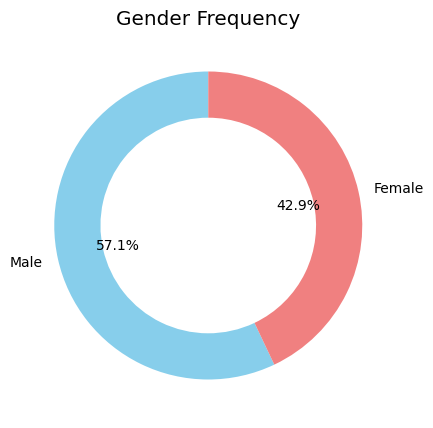

In [10]:
#@title Gender Frequency
gender_freq = marathon['gender'].value_counts()

# Set up the plot
gender_freq.plot(kind='pie', autopct='%1.1f%%', labels=['Male', 'Female'], startangle=90, figsize=(5, 5), colors=['skyblue', 'lightcoral'], wedgeprops=dict(width=0.3))

# Plot labels
plt.title("Gender Frequency")
plt.ylabel("")

# Show plot
plt.show()


In [11]:
#@title Average pace overall and by gender

mean_pace_all = marathon['pace'].mean()
mean_pace_men = males['pace'].mean()
mean_pace_women = females['pace'].mean()

print(f'Average Pace:\nFor everyone: {mean_pace_all}\nFor men: {mean_pace_men}\nFor women: {mean_pace_women}')



Average Pace:
For everyone: 5.298070209360532
For men: 5.057744645799011
For women: 5.617333137404485


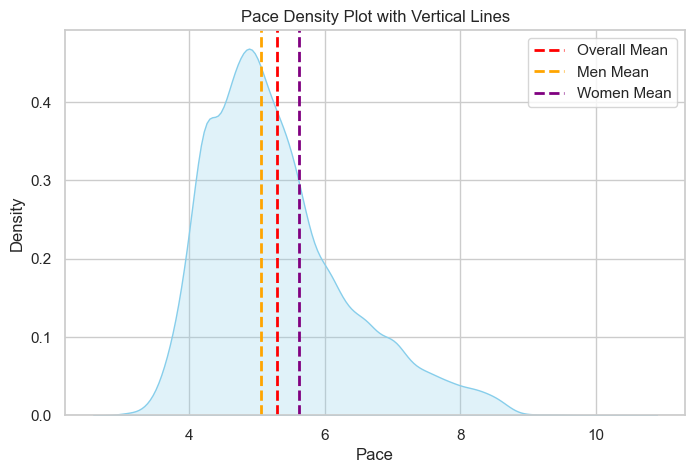

In [12]:
#@title Average pace density overall and by gender
# Graph setup
plt.figure(figsize=(8, 5))
sns.set(style="whitegrid")

# Density plot of average pace
sns.kdeplot(marathon['pace'], color='skyblue', fill=True)

# Vertical line for overall mean
plt.axvline(mean_pace_all, color='red', linestyle='dashed', linewidth=2, label='Overall Mean')

# Mean pace for men
plt.axvline(mean_pace_men, color='orange', linestyle='dashed', linewidth=2, label='Men Mean')

# Mean pace for women
plt.axvline(mean_pace_women, color='purple', linestyle='dashed', linewidth=2, label='Women Mean')

# Graph labels
plt.title('Pace Density Plot with Vertical Lines')
plt.xlabel('Pace')
plt.ylabel('Density')
plt.legend()

# Show plot
plt.show()


In [13]:
#@title Standard deviation
std_dev_all = marathon['pace'].std()
print('Standard Deviation:', std_dev_all)

Standard Deviation: 1.0417826762984979


C:\Users\Luiza\AppData\Local\Temp\ipykernel_1460\1476249095.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(males['pace'], shade=True, color='skyblue', label='Men')
C:\Users\Luiza\AppData\Local\Temp\ipykernel_1460\1476249095.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(females['pace'], shade=True, color='lightcoral', label='Women')


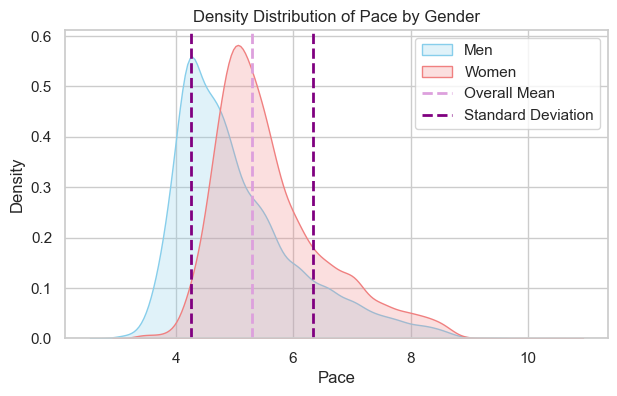

In [14]:
#@title Pace density by gender

# Graph setup
plt.figure(figsize=(7, 4))
sns.set(style="whitegrid")

# Density plot
## for men
sns.kdeplot(males['pace'], shade=True, color='skyblue', label='Men')
## for women
sns.kdeplot(females['pace'], shade=True, color='lightcoral', label='Women')

# Vertical lines with overall mean information
plt.axvline(mean_pace_all, color='plum', linestyle='dashed', linewidth=2, label='Overall Mean')
plt.axvline((mean_pace_all + std_dev_all), color='purple', linestyle='dashed', linewidth=2, label='Standard Deviation')
plt.axvline((mean_pace_all - std_dev_all), color='purple', linestyle='dashed', linewidth=2)

# Graph labels
plt.title('Density Distribution of Pace by Gender')
plt.xlabel('Pace')
plt.ylabel('Density')
plt.legend()

# Show the graph
plt.show();


In [15]:
#@title Count of individuals with the lowest pace by gender

## getting the same number of elements for men
tm_men = males.head(len(females))

# men with pace less than women
men_pace_less_than_women = (tm_men['pace'] < females['pace']).sum()

# women with pace less than men
women_pace_less_than_men = (females['pace'] < tm_men['pace']).sum()

print(f'Total number of men: {len(males)} and Total number of women: {len(females)}\n')
print(f'Men with pace less than women: {men_pace_less_than_women} (out of {len(tm_men)} men)')
print(f'Women with pace less than men: {women_pace_less_than_men} (out of {len(females)} women)')

Total number of men: 15175 and Total number of women: 11423

Men with pace less than women: 10184 (out of 11423 men)
Women with pace less than men: 1239 (out of 11423 women)


In [16]:
#@title Average pace by age group

# for everyone
mean_pace_age_group_all = marathon.groupby('division_age')['pace'].mean().reset_index()

# for men
mean_pace_age_group_men = males.groupby('division_age')['pace'].mean().reset_index()

# for women
mean_pace_age_group_women = females.groupby('division_age')['pace'].mean().reset_index()

print(f'Mean pace by age group:\nFor everyone: {mean_pace_age_group_all}\nFor men: {mean_pace_age_group_men}\nFor women: {mean_pace_age_group_women}')


Mean pace by age group:
For everyone:   division_age      pace
0        18-39  5.037818
1        40-44  5.134520
2        45-49  5.278441
3        50-54  5.474871
4        55-59  5.652182
5        60-64  5.856056
6        65-69  6.153434
7        70-74  6.557524
8        75-79  7.055347
9          80+  7.169127
For men:   division_age      pace
0        18-39  4.678720
1        40-44  4.833377
2        45-49  5.006103
3        50-54  5.269526
4        55-59  5.435386
5        60-64  5.709755
6        65-69  6.022541
7        70-74  6.432884
8        75-79  7.055151
9          80+  7.092989
For women:   division_age      pace
0        18-39  5.426327
1        40-44  5.493871
2        45-49  5.615978
3        50-54  5.823973
4        55-59  6.030443
5        60-64  6.164204
6        65-69  6.478595
7        70-74  6.985721
8        75-79  7.056310
9          80+  7.283333


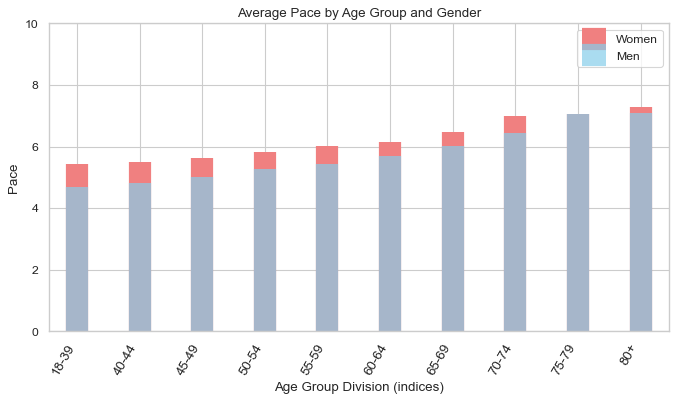

In [17]:
#@title Average pace by age group and gender

# figure and axis
fig, ax = plt.subplots(figsize=(10, 5), facecolor='white', dpi=80)

# Add vertical bars representing the average pace for women and men
ax.vlines(x=mean_pace_age_group_women.index, ymin=0, ymax=mean_pace_age_group_women['pace'], color='lightcoral', alpha=1, linewidth=20, label='Women')
ax.vlines(x=mean_pace_age_group_men.index, ymin=0, ymax=mean_pace_age_group_men['pace'], color='skyblue', alpha=0.7, linewidth=20, label='Men')

# Horizontal axis parameters
plt.xticks(mean_pace_age_group_men.index, mean_pace_age_group_men['division_age'], rotation=60, horizontalalignment='right', fontsize=12)

ax.set(ylabel='Pace', ylim=(0, 10))
ax.set(xlabel='Age Group Division (indices)')

plt.legend()
plt.title('Average Pace by Age Group and Gender')
plt.show()


## Pace and Running Teams Analysis 👭
### Motivation
> - Which team is the fastest?
> - Does being part of a team make you faster?
> - What is the percentage of runners with and without a team?
> - How does the pace differ between runners with and without a team?

In [18]:
#@title Dividing the population into 2 samples
without_team = marathon[marathon['team'] == 'Team–'].reset_index()
with_team = marathon[marathon['team'] != 'Team–'].reset_index()

In [19]:
#@title 1st Sample - Runners with team
with_team.head(3)

,index,division_age,overall_position,gender_position,age_group_position,name,team,bib_number,half_marathon_time,net_marathon_time,gross_marathon_time,gender,half_marathon_time_seconds,net_marathon_time_seconds,gross_marathon_time_seconds,net_marathon_time_minutes,pace
0,9,18-39,10,10,10,"Mcdonald, Matthew",TeamBoston Athletic Association,24,1H 3M 59S,2H 10M 17S,2H 10M 17S,M,3839.0,7817,7817,130.283333,3.101984
1,16,18-39,17,17,17,"Flavin, Jp",TeamHansons-Brooks Distance Project,48,1H 5M 40S,2H 13M 27S,2H 13M 27S,M,3940.0,8007,8007,133.450000,3.177381
2,24,18-39,25,25,25,"Hampton, Jonas",TeamBoston Athletic Association,28,1H 5M 33S,2H 17M 5S,2H 17M 5S,M,3933.0,8225,8225,137.083333,3.263889


In [20]:
#@title 2nd Sample - Runners without team
without_team.head(3)

,index,division_age,overall_position,gender_position,age_group_position,name,team,bib_number,half_marathon_time,net_marathon_time,gross_marathon_time,gender,half_marathon_time_seconds,net_marathon_time_seconds,gross_marathon_time_seconds,net_marathon_time_minutes,pace
0,0,18-39,1,1,1,"Chebet, Evans",Team–,1,1H 2M 20S,2H 5M 54S,2H 5M 54S,M,3740.0,7554,7554,125.900000,2.997619
1,1,18-39,2,2,2,"Geay, Gabriel",Team–,3,1H 2M 20S,2H 6M 4S,2H 6M 4S,M,3740.0,7564,7564,126.066667,3.001587
2,2,18-39,3,3,3,"Kipruto, Benson",Team–,5,1H 2M 19S,2H 6M 6S,2H 6M 6S,M,3739.0,7566,7566,126.100000,3.002381


In [21]:
#@title Number of teams
num_teams = with_team['team'].nunique()
print('Number of teams:', num_teams)

Number of teams: 85


In [22]:
#@title Teams with the most runners

with_team['team'].value_counts().head()


team
TeamTracksmith Boston Hares        46
TeamMisty Mountain Runners         43
TeamCharlotte Running Club         42
TeamBoston Athletic Association    41
TeamSan Diego Track Club           40
Name: count, dtype: int64

In [23]:
#@title Number of runners with and without a team
# with team
num_runners_with_team = with_team['name'].nunique()

# without team
num_runners_without_team = without_team['name'].nunique()

print(f'Number of runners\nWith team: {num_runners_with_team}\nWithout team: {num_runners_without_team}')

Number of runners
With team: 1257
Without team: 25092


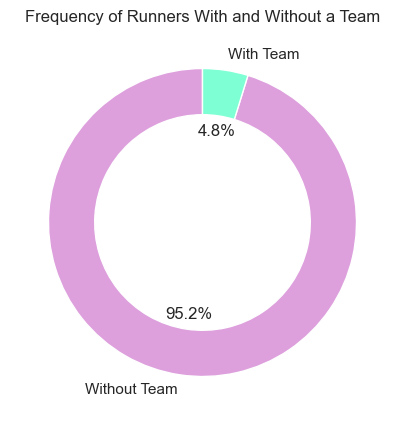

In [24]:
#@title Frequency of runners with and without a team

# New dataframe for counting runners with and without a team
frequency_df = pd.DataFrame({'Frequency': [num_runners_without_team, num_runners_with_team]},
                             index=['Without Team', 'With Team'])

# Pie chart setup
frequency_df['Frequency'].plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(5, 5),
                                labels=frequency_df.index, colors=['plum', 'aquamarine'], wedgeprops=dict(width=0.3))

# Graph labels
plt.title("Frequency of Runners With and Without a Team")
plt.ylabel("")

# Show plot
plt.show()

In [25]:
#@title Average pace runners with and without team
mean_pace_with_team = with_team['pace'].mean()
mean_pace_without_team = without_team['pace'].mean()

print(f'Average Pace\nWith team: {mean_pace_with_team}\nWithout team: {mean_pace_without_team}')


Average Pace
With team: 4.8352736139500845
Without team: 5.321045667806716


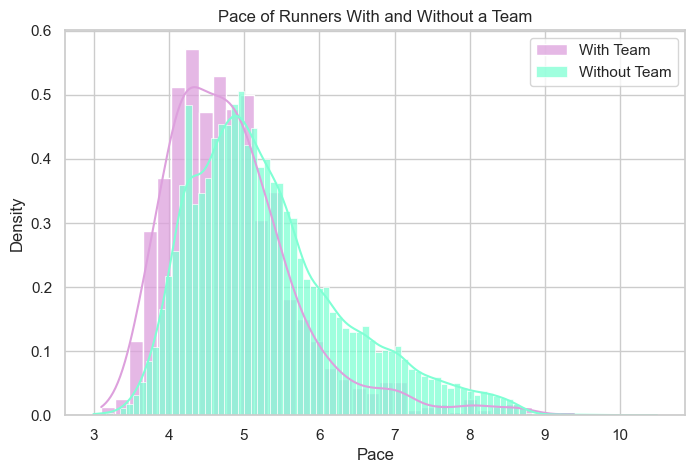

In [26]:
#@title Pace density with and without a team

# Graph setup
plt.figure(figsize=(8, 5))

# Normalize histograms
sns.histplot(with_team['pace'], color='plum', alpha=0.75, label='With Team', kde=True, stat='density')
sns.histplot(without_team['pace'], color='aquamarine', alpha=0.75, label='Without Team', kde=True, stat='density')

# Graph labels
plt.xlabel('Pace')
plt.ylabel('Density')
plt.title("Pace of Runners With and Without a Team")
plt.legend()
plt.show()


In [27]:
#@title Average pace per team
team_paces = marathon.groupby('team')['pace'].mean().reset_index()
print(team_paces)


                                       team      pace
0                      TeamAl-limite Mexico  4.806587
1                  TeamAnn Arbor Track Club  4.119048
2                      TeamBEN Running Club  4.726401
3                TeamBakersfield Greyhounds  4.803968
4                TeamBattle Road Track Club  4.188889
..                                      ...       ...
81         TeamWinner's Circle Running Club  5.509776
82                TeamWolfpack Running Club  4.406746
83  TeamYellowstone Valley Distance Project  4.637302
84               Teamsan Luis Distance Club  5.770679
85                                    Team–  5.321046

[86 rows x 2 columns]


In [28]:
#@title Average pace by age group for runners with and without a team
mean_pace_age_group_with_team = with_team.groupby('division_age')['pace'].mean().reset_index()
mean_pace_age_group_without_team = without_team.groupby('division_age')['pace'].mean().reset_index()

print(f'Average Pace by Age Group\nWith Team: {mean_pace_age_group_with_team}\nWithout Team: {mean_pace_age_group_without_team}')


Average Pace by Age Group
With Team:   division_age      pace
0        18-39  4.386089
1        40-44  4.674372
2        45-49  4.959868
3        50-54  5.086252
4        55-59  5.353505
5        60-64  5.537228
6        65-69  6.043264
7        70-74  6.847192
8        75-79  7.345337
Without Team:   division_age      pace
0        18-39  5.069756
1        40-44  5.159612
2        45-49  5.293357
3        50-54  5.495728
4        55-59  5.664702
5        60-64  5.871578
6        65-69  6.159312
7        70-74  6.543151
8        75-79  7.034257
9          80+  7.169127


In [29]:
#@title Count of runners by age group with/without team
num_divisions_with_team = with_team['division_age'].value_counts()
num_divisions_without_team = without_team['division_age'].value_counts()

print(f"With Team: {num_divisions_with_team}\nWithout Team: {num_divisions_without_team}")

With Team: division_age
18-39    475
40-44    213
45-49    182
50-54    166
55-59     90
60-64     76
65-69     39
70-74     13
75-79      4
Name: count, dtype: int64
Without Team: division_age
18-39    9693
40-44    3906
45-49    3887
50-54    3093
55-59    2147
60-64    1561
65-69     731
70-74     262
75-79      55
80+         5
Name: count, dtype: int64


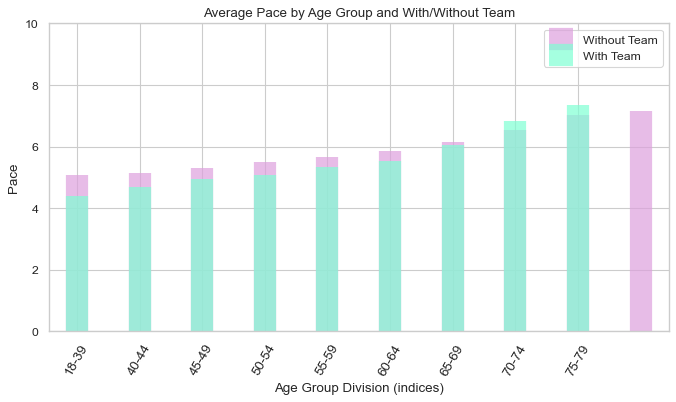

In [30]:
#@title Average pace by age group with/without team
# Graph setup
fig, ax = plt.subplots(figsize=(10, 5), facecolor='white', dpi=80)

# Vertical bars with average pace
## without team
ax.vlines(x=mean_pace_age_group_without_team.index, ymin=0, ymax=mean_pace_age_group_without_team['pace'], color='plum', alpha=0.7, linewidth=20, label='Without Team')
## with team
ax.vlines(x=mean_pace_age_group_with_team.index, ymin=0, ymax=mean_pace_age_group_with_team['pace'], color='aquamarine', alpha=0.7, linewidth=20, label='With Team')

# Labels
plt.xticks(mean_pace_age_group_with_team.index, mean_pace_age_group_with_team['division_age'], rotation=60, fontsize=12)
ax.set(ylabel='Pace', ylim=(0, 10))
ax.set(xlabel='Age Group Division (indices)')
plt.legend()
plt.title('Average Pace by Age Group and With/Without Team')

# Show plot
plt.show()



## Conclusion ✨

### Performance by genre 👩‍  👨‍  

>- **Difference in Pace:** In general, men had a slower pace compared to women, indicating that, on average, men in this marathon were faster.
>- **Greater Male Participation:** The marathon had a greater participation of men compared to women.

### Team Performance 👭


>- **Teams have a lower pace:** The analysis shows that runners who are part of teams had a lower pace than those without a team. This may be related to specialized training and that the presence of a team can positively influence performance.
>- **Running and Longevity:** In the 50-54 age group, there is a reduction in the number of runners. It may be related to the risk of injury and changing priorities.

In [31]:
#@title Men, women, with and without a team
# Filtering data for men
men_with_team = marathon[(marathon['team'] != 'Team–') & (marathon['gender'] == 'M')].reset_index()
men_without_team = marathon[(marathon['team'] == 'Team–') & (marathon['gender'] == 'M')].reset_index()

# Filtering data for women
women_with_team = marathon[(marathon['team'] != 'Team–') & (marathon['gender'] == 'W')].reset_index()
women_without_team = marathon[(marathon['team'] == 'Team–') & (marathon['gender'] == 'W')].reset_index()

C:\Users\Luiza\AppData\Local\Temp\ipykernel_1460\13190892.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average Pace', y='Category', data=pace_data, palette='pastel')


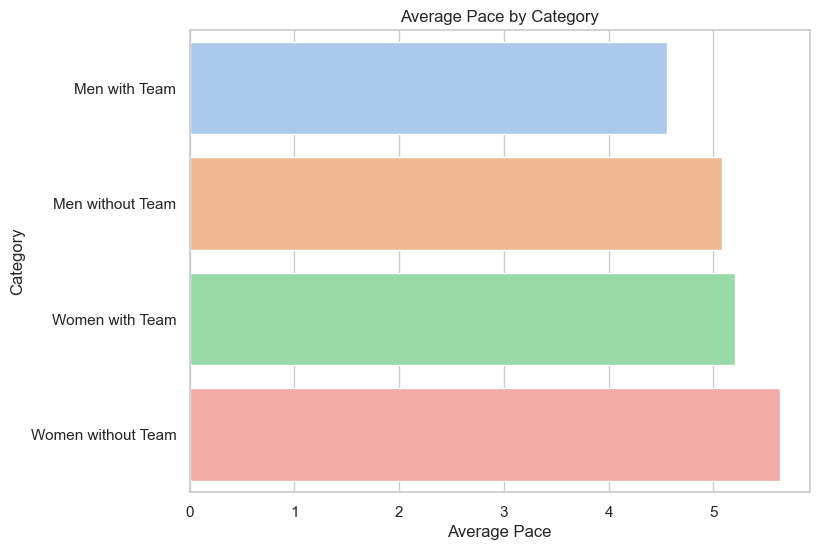

In [32]:
#@title Graphic with gender and team relationship
# Average pace for each category
mean_pace_men_with_team = men_with_team['pace'].mean()
mean_pace_men_without_team = men_without_team['pace'].mean()
mean_pace_women_with_team = women_with_team['pace'].mean()
mean_pace_women_without_team = women_without_team['pace'].mean()

# New dataframe with results
pace_data = pd.DataFrame({
    'Category': ['Men with Team', 'Men without Team', 'Women with Team', 'Women without Team'],
    'Average Pace': [mean_pace_men_with_team, mean_pace_men_without_team, mean_pace_women_with_team, mean_pace_women_without_team]
})

# Graph setup
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Bar plot
sns.barplot(x='Average Pace', y='Category', data=pace_data, palette='pastel')

# Graph labels
plt.title('Average Pace by Category')
plt.xlabel('Average Pace')
plt.ylabel('Category')

# Show the graph
plt.show()



In [33]:
#@title Pace values ​​by category
print(f'Average Pace\nMen with team: {mean_pace_men_with_team}\nMen without team: {mean_pace_men_without_team}\nWomen with team: {mean_pace_women_with_team}\nWomen without team: {mean_pace_women_without_team}')

Average Pace
Men with team: 4.557699949504928
Men without team: 5.082760720765841
Women with team: 5.210387182910547
Women without team: 5.637329104125118
